In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=2)

In [5]:
from sklearn.preprocessing import StandardScaler

columns = x_train.columns
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train = pd.DataFrame(x_train,columns=columns)
x_test = sc.transform(x_test)
x_test = pd.DataFrame(x_test,columns=columns)

In [6]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.013303,1.775766,-0.014920,-0.144789,0.228790,0.175467,-0.544402,-0.128256,-1.012054,-0.152706,...,-0.186400,1.187213,-0.196141,-0.291354,-0.332182,-0.171367,-0.659330,-0.132370,-1.080145,-0.035279
1,-0.844828,-0.628428,-0.877027,-0.765610,-1.019821,-1.249059,-0.944554,-0.889091,-1.109505,-0.186165,...,-0.949992,-0.884569,-0.980765,-0.806497,-1.240630,-1.224541,-1.078200,-1.115526,-0.857740,-0.720989
2,1.447559,0.711802,1.474288,1.405424,-0.758582,0.754792,0.319555,0.511737,-0.149990,-1.086665,...,1.513753,1.008666,1.813225,1.478636,0.016558,1.968844,0.565914,0.875840,0.496760,0.463217
3,-0.081648,0.999483,-0.007498,-0.152149,2.546938,1.407012,0.893973,1.135134,1.664093,1.665752,...,0.636255,2.583414,0.662848,0.513646,3.908676,1.717432,0.942800,1.341755,2.568643,1.371035
4,-0.896086,0.451519,-0.818069,-0.793920,1.872772,0.351950,0.228993,0.225711,0.329767,0.864176,...,-0.705305,1.536263,-0.590122,-0.638931,2.543851,0.106982,0.642160,0.442004,0.113821,0.676463


In [7]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=5)

In [8]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [9]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test.values)
accuracy_score(y_test,y_pred)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9736842105263158

In [10]:
scores = []

for i in range(1,16):
    
    knn = KNN(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    
    y_pred = knn.predict(x_test.values)

    scores.append(accuracy_score(y_test, y_pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning:

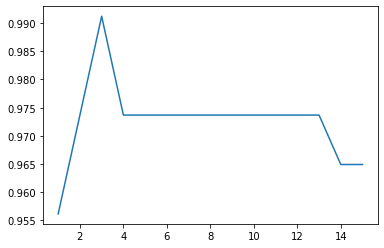

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)

In [24]:
df = pd.read_csv('Social_Network_Ads.csv')
df = df.iloc[:,1:]
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
x = df.iloc[:,:3]
y = df.iloc[:,3].values
columns = x.columns
sc = StandardScaler()
x = sc.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
y_train

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [26]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors = 5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.95

In [27]:
from collections import Counter

In [28]:
class Knn:
    def __init__(self,k):
        self.n_neighbors = k
        self.x_train = None
        self.y_train = None
        
    def fit(self,x_train,y_test):
        self.x_train = x_train
        self.y_train = y_train
        
    def predict(self,x_test):
        y_pred = []
        for i in x_test:
            distances = []
            for j in self.x_train:
                distances.append(self.calculate_distance(i,j))
            neigh = sorted(list(enumerate(distances)),key = lambda x:x[1])[0:self.n_neighbors]
            label = self.majority_count(neigh)
            y_pred.append(label)
        return np.array(y_pred)
    
    def calculate_distance(self,point_a,point_b):
        return np.linalg.norm(point_a - point_b)
    
    def majority_count(self,neighbors):
        votes = []
        for i in neighbors:
            votes.append(self.y_train[i[0]])
        votes = Counter(votes)
        return votes.most_common()[0][0]

In [29]:
knn = Knn(k=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.95